# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
# mount with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# load data from drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# check data type and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.shape

(284807, 31)

## explore data

In [6]:
# find missing values
data.isnull().values.any()

False

In [7]:
# find number of fraud and valid transections
fraud = data[data['Class']==1]
valid = data[data['Class']!=1]
print(f'Fraud transections: {len(fraud)}')
print(f'Valid transections: {len(valid)}')

Fraud transections: 492
Valid transections: 284315


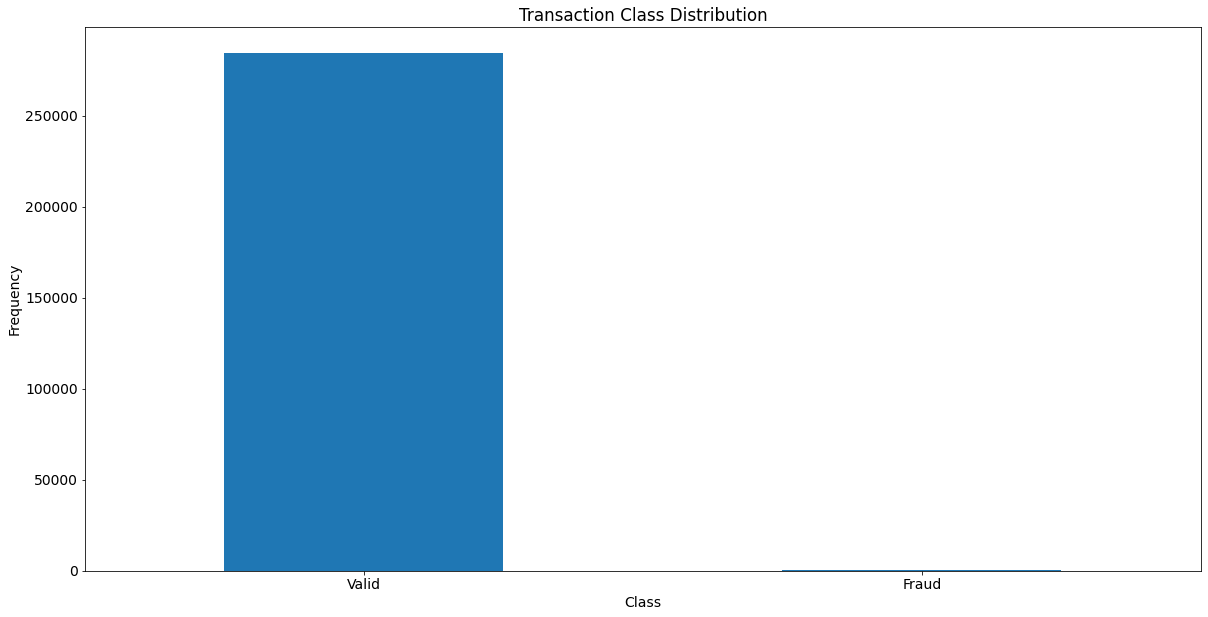

In [8]:
# visualize the difference between the two classes
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})

classes = data['Class'].value_counts()
classes.plot(kind = 'bar', rot=0)

plt.xticks(range(2), labels=['Valid', 'Fraud'])
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

In [9]:
# amount stats on the fraud transections
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
# amount stats on the valid transections
valid['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

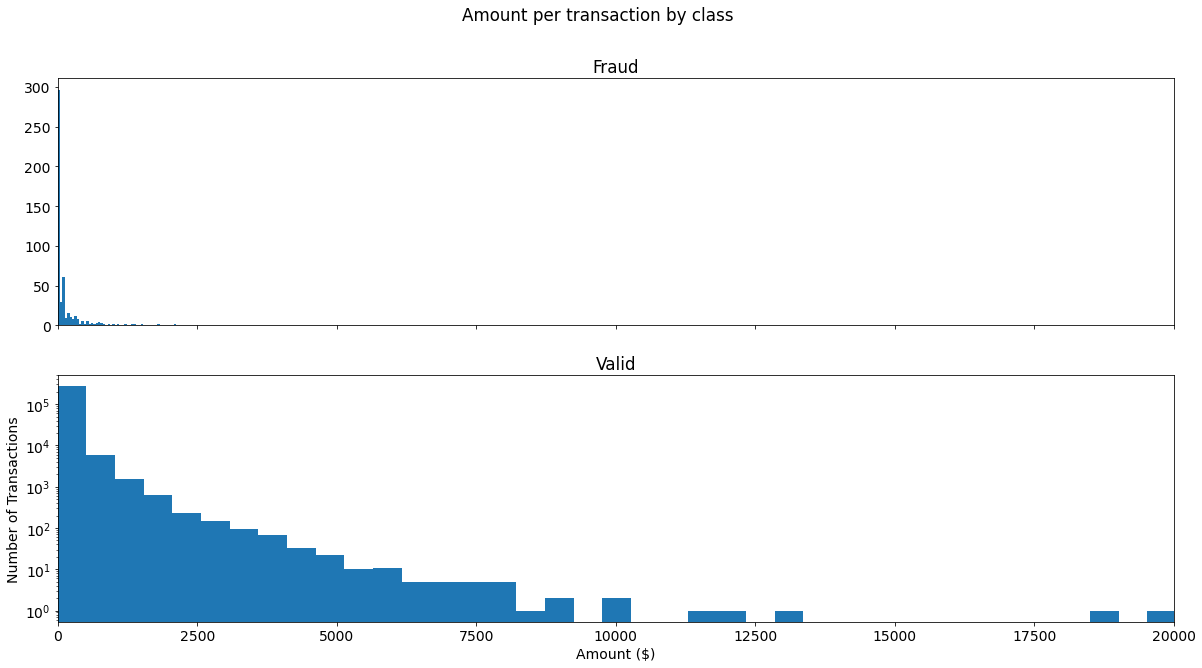

In [11]:
# visual representation of the amount taken in each transection between both classes
plt.rcParams.update({'font.size': 14})
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20,10))
f.suptitle('Amount per transaction by class')

ax1.hist(fraud['Amount'], bins = 50)
ax1.set_title('Fraud')
ax2.hist(valid['Amount'], bins = 50)
ax2.set_title('Valid')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

plt.show()

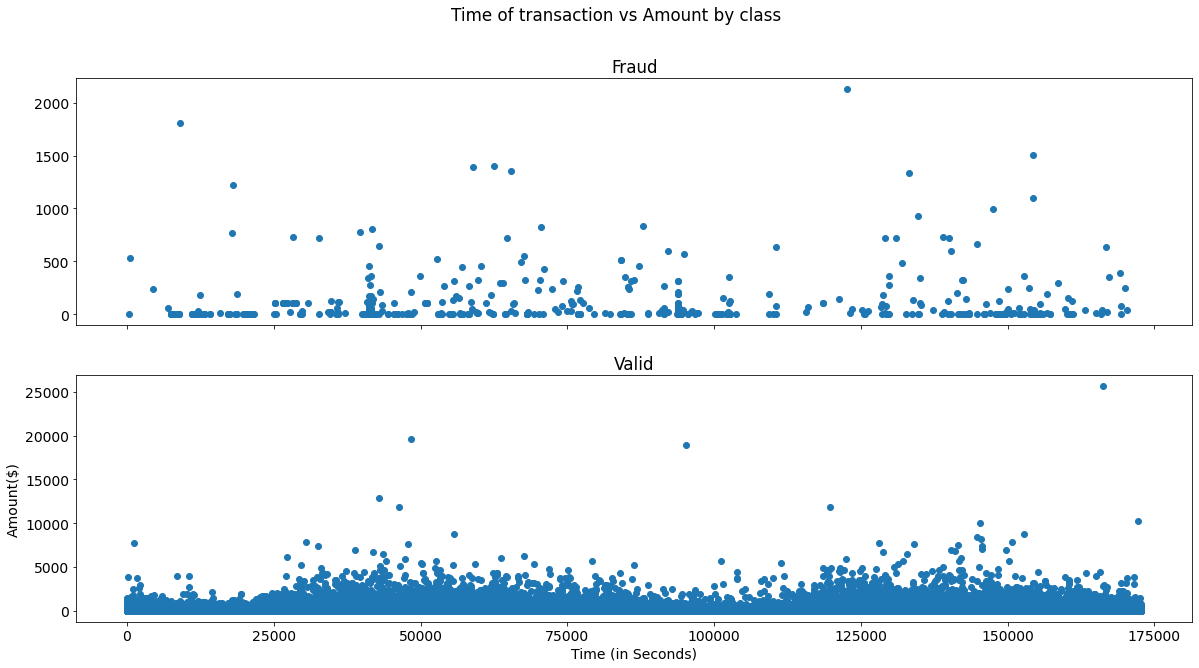

In [12]:
# visual representation of transections between both classes during certain time frame and the amount
plt.rcParams.update({'font.size': 14})
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20,10))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud['Time'], fraud['Amount'])
ax1.set_title('Fraud')
ax2.scatter(valid['Time'], valid['Amount'])
ax2.set_title('Valid')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount($)')

plt.show()

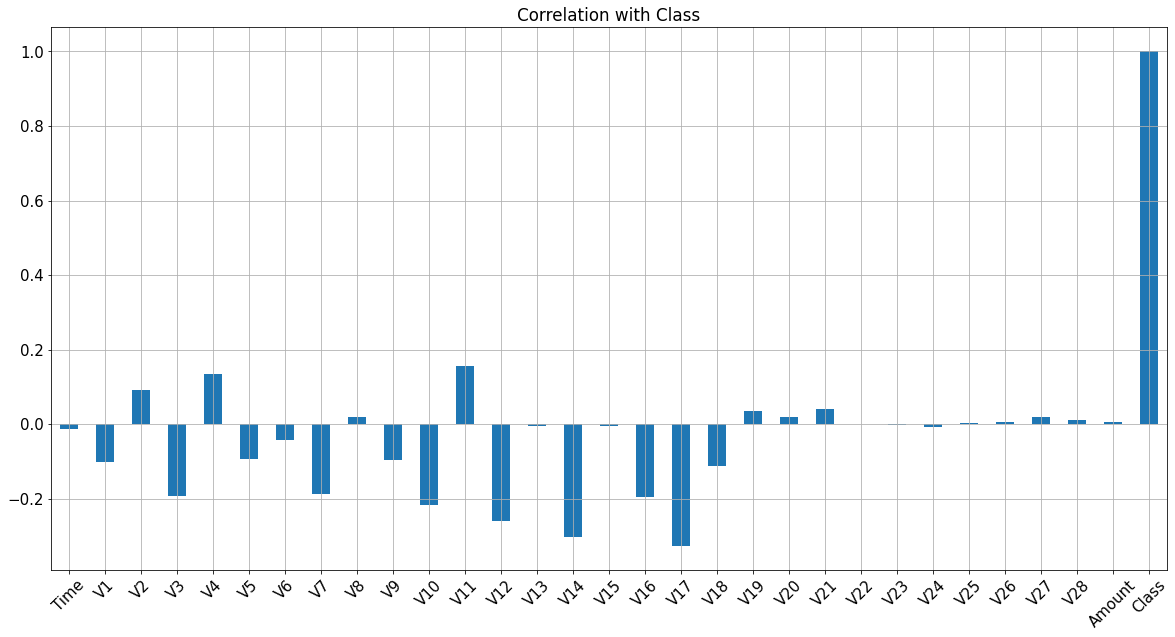

In [13]:
# check correlation of each feature with Class inthe data
data.corrwith(data['Class']).plot.bar(figsize = (20, 10), title = "Correlation with Class",
                                   fontsize = 15, rot = 45, grid = True)

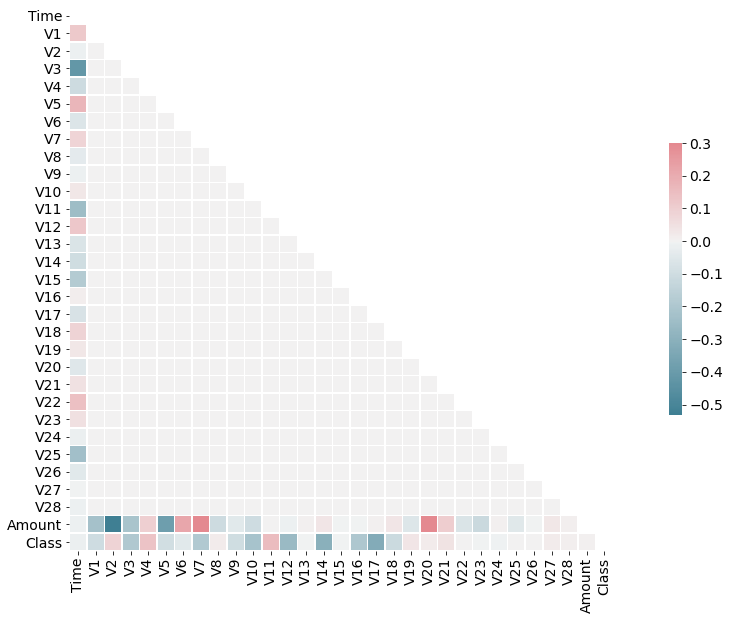

In [14]:
# compute correlation matrix
corr = data.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# figure size
f, ax = plt.subplots(figsize=(20, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

## data preprocessing

In [15]:
# split data into input (X) and output (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [16]:
X.shape, y.shape

((284807, 30), (284807,))

In [17]:
# split data into train set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X,y, test_size = 0.3,
                                                                            random_state=0)

In [18]:
train_features.shape, test_features.shape

((199364, 30), (85443, 30))

In [19]:
train_labels.shape, test_labels.shape

((199364,), (85443,))

In [20]:
# normalize the data
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)

train_features = (train_features-train_mean) / train_std
test_features = (test_features-train_mean) / train_std

In [21]:
train_features[0]

array([ 0.40256043, -0.06741917,  0.06620928, -0.42793636, -0.70335793,
        1.32664106,  1.31029523,  0.40596687,  0.52377954,  0.01539789,
       -0.33314892,  0.51856626,  0.50872963, -0.74450048,  0.51444736,
       -0.17890951, -1.08487117,  0.30826322, -2.10211241, -1.15349585,
       -0.08184582, -0.08403335,  0.00730435,  0.40018973, -4.0759747 ,
       -1.70784662,  0.70055611,  0.76406525,  0.23026665, -0.16569231])

# build and train model

In [22]:
# model definition
def build_model():
  model = Sequential([
      Dense(10, activation='relu', input_shape=(train_features.shape[-1],)),
      Dense(8, activation='relu'),
      Dense(6, activation='relu'),
      Dense(1, activation="sigmoid")
  ])


  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [23]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [24]:
# train model on 100 epochs and 20% validation data
history = model.fit(train_features, train_labels, epochs=100, batch_size=128,
                    validation_split = 0.2)

Epoch 1/100
1247/1247 [==============================] - 4s 2ms/step - loss: 0.0959 - accuracy: 0.9982 - val_loss: 0.0054 - val_accuracy: 0.9980
Epoch 2/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 3/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 4/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 6/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 7/100
1247/1247 [==============================] - 2s 2ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0033 - val_ac

In [25]:
# store history in the dataframe
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.001085,0.999555,0.006638,0.999248,95
96,0.001199,0.999511,0.007101,0.999323,96
97,0.001114,0.999574,0.006923,0.999197,97
98,0.001056,0.999586,0.006813,0.999298,98
99,0.001060,0.999574,0.007146,0.999298,99


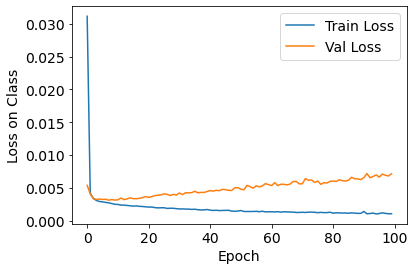

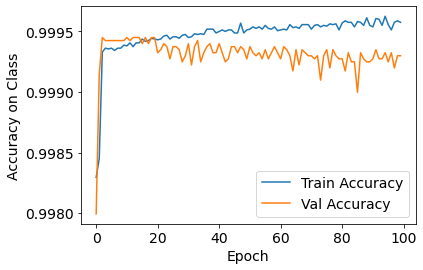

In [26]:
# plot loss and accuracy on validation data

# loss
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss on Class')
plt.plot(hist['epoch'], hist['loss'], label = 'Train Loss')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()

# accuracy
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy on Class')
plt.plot(hist['epoch'], hist['accuracy'], label = 'Train Accuracy')
plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
plt.legend()

#### this is classic example of overfitting on imbalance classification because the number of fraud transections are so minimum that it is possible for the model to treat them as valid transections as well, let's apply some techniques to overcome this problem

## analyze Class imbalance in the labels

In [27]:
# count number of occurrences of each value in array of non-negative ints
counts = np.bincount(train_labels)
fraud_ratio = 100 * float(counts[1]) / len(train_labels)
print(f'Valid transections: {counts[0]}, Fraud transections": {counts[1]}')
print('Total fraud samples in training data: {:.2f}%'.format(fraud_ratio))

# weight distribution for valid and fraud transections for training
weight_for_valid = 1.0 / counts[0]    
weight_for_fraud = 1.0 / counts[1]

Valid transections: 199019, Fraud transections": 345
Total fraud samples in training data: 0.17%


## build and train another model

In [28]:
# model definition with dropout layers
from keras.layers import Dropout

def build_model2():
  model = Sequential([
          Dense(256, activation="relu", input_shape=(train_features.shape[-1],)),
          Dense(256, activation="relu"),
          # first dropout layer
          Dropout(0.3),
          Dense(256, activation="relu"),
          # second dropout layer
          Dropout(0.3),
          Dense(1, activation="sigmoid")])

  return model

In [29]:
model = build_model2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
________________________________________________

## train model with 20% validation data and with class_weight argument

In [30]:
from keras import metrics
from keras import optimizers

# classification metrics based on True/False positives & negatives
metrics = [
    metrics.FalseNegatives(name="fn"),
    metrics.FalsePositives(name="fp"),
    metrics.TrueNegatives(name="tn"),
    metrics.TruePositives(name="tp"),
    metrics.Precision(name="precision"),
    metrics.Recall(name="recall")]

# compile the model network with optimizer learning rate
model.compile(optimizer=optimizers.Adam(0.01), loss='binary_crossentropy', metrics=metrics)

# add callbacks in the training loop
callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]

# assign class weight for fruad and valid 
class_weight = {0: weight_for_valid, 1: weight_for_fraud}

# train the model
history = model.fit(train_features, train_labels, batch_size=2048, epochs=30, verbose=2,
          callbacks=callbacks, validation_split=0.2, class_weight=class_weight)

Epoch 1/30
78/78 - 7s - loss: 3.0112e-06 - fn: 28.0000 - fp: 24417.0000 - tn: 134809.0000 - tp: 237.0000 - precision: 0.0096 - recall: 0.8943 - val_loss: 0.2008 - val_fn: 5.0000 - val_fp: 1489.0000 - val_tn: 38304.0000 - val_tp: 75.0000 - val_precision: 0.0480 - val_recall: 0.9375
Epoch 2/30
78/78 - 4s - loss: 1.6985e-06 - fn: 25.0000 - fp: 5060.0000 - tn: 154166.0000 - tp: 240.0000 - precision: 0.0453 - recall: 0.9057 - val_loss: 0.2154 - val_fn: 3.0000 - val_fp: 2665.0000 - val_tn: 37128.0000 - val_tp: 77.0000 - val_precision: 0.0281 - val_recall: 0.9625
Epoch 3/30
78/78 - 4s - loss: 1.4409e-06 - fn: 20.0000 - fp: 4735.0000 - tn: 154491.0000 - tp: 245.0000 - precision: 0.0492 - recall: 0.9245 - val_loss: 0.2019 - val_fn: 3.0000 - val_fp: 2517.0000 - val_tn: 37276.0000 - val_tp: 77.0000 - val_precision: 0.0297 - val_recall: 0.9625
Epoch 4/30
78/78 - 4s - loss: 1.2478e-06 - fn: 20.0000 - fp: 4727.0000 - tn: 154499.0000 - tp: 245.0000 - precision: 0.0493 - recall: 0.9245 - val_loss: 0.0

In [31]:
# evaluate the model on test set
score = model.evaluate(test_features, test_labels)
print('Loss: {}\nFalse -ve: {}\nFalse +ve: {}\nTrue -ve: {}\nTrue +ve: {}\nPrecision: {}\nRecall: {}'.format(score[0], score[1], score[2], score[3], score[4], score[5], score[6]))

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0256 - fn: 20.0000 - fp: 400.0000 - tn: 84896.0000 - tp: 127.0000 - precision: 0.2410 - recall: 0.8639
Loss: 0.025573978200554848
False -ve: 20.0
False +ve: 400.0
True -ve: 84896.0
True +ve: 127.0
Precision: 0.24098671972751617
Recall: 0.8639456033706665


In [32]:
# make predictions on test features
test_pred = model.predict(test_features)

# although this is not recommended because it impacts the overall result accuracy
test_pred = test_pred>0.5 

In [33]:
# check how the model has performed
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.24      0.86      0.38       147

    accuracy                           1.00     85443
   macro avg       0.62      0.93      0.69     85443
weighted avg       1.00      1.00      1.00     85443



Accuracy on test data: 0.9951


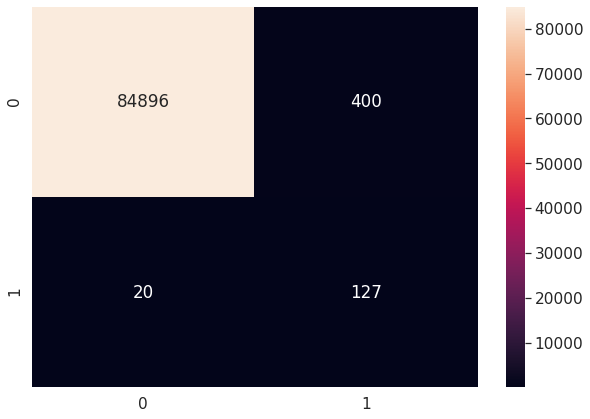

In [34]:
# visualize the confusion matrix, where rows are true values and cols are predictions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# make the Confusion Matrix
conMatrix = confusion_matrix(test_labels, test_pred)

# store in the dataframe
confusion_df = pd.DataFrame(conMatrix, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_df, annot=True, fmt='g')

# check accuracy
print("Accuracy on test data: %0.4f" % accuracy_score(test_labels, test_pred))

In [35]:
# roc-auc performance measurement
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels,test_pred)

0.9296280132762165

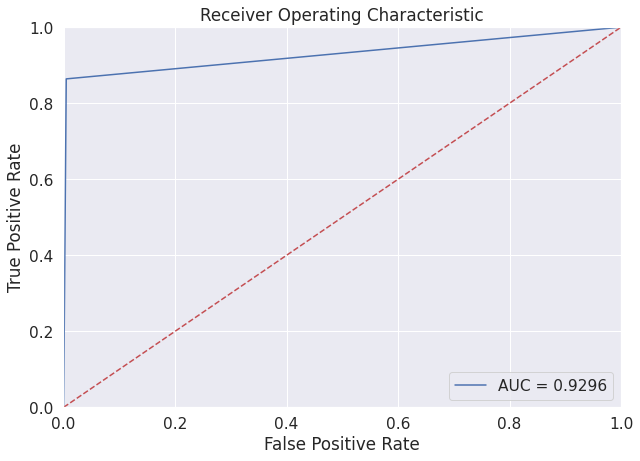

In [36]:
# plot roc curve to understand the performance of the binary classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_labels, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

# save model

In [37]:
# save model and architecture
model.save('card-detector.h5')
print('model saved')

model saved
